<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multi-label" data-toc-modified-id="Multi-label-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multi-label</a></span><ul class="toc-item"><li><span><a href="#linnerud-데이터-불러오기" data-toc-modified-id="linnerud-데이터-불러오기-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>linnerud 데이터 불러오기</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#다중공선성" data-toc-modified-id="다중공선성-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>다중공선성</a></span></li><li><span><a href="#MultiOutputRegressor" data-toc-modified-id="MultiOutputRegressor-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>MultiOutputRegressor</a></span></li><li><span><a href="#MultiOutputClassifier" data-toc-modified-id="MultiOutputClassifier-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>MultiOutputClassifier</a></span></li></ul></li><li><span><a href="#Multi-class" data-toc-modified-id="Multi-class-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multi-class</a></span><ul class="toc-item"><li><span><a href="#One-vs-One" data-toc-modified-id="One-vs-One-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>One vs One</a></span></li><li><span><a href="#One-vs-Rest" data-toc-modified-id="One-vs-Rest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>One vs Rest</a></span></li></ul></li><li><span><a href="#pandas-profiling" data-toc-modified-id="pandas-profiling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>pandas-profiling</a></span></li><li><span><a href="#Non-Parametric-Model" data-toc-modified-id="Non-Parametric-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Non Parametric Model</a></span></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/8th_ai_lecture_fundamental](https://github.com/realblack0/8th_ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## Multi-label

### linnerud 데이터 불러오기

In [1]:
from sklearn.datasets import load_linnerud

In [6]:
import pandas as pd

In [2]:
data = load_linnerud()

In [3]:
dir(data)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'target',
 'target_filename',
 'target_names']

In [4]:
# 항상 데이터 설명을 잘 읽어야 한다. 
print(data.DESCR) 

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *physiological* - CSV containing 20 observations on 3 exercise variables:
   Weight, Waist and Pulse.

- *exercise* - CSV containing 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [9]:
# 다른 dataset과 달리, target이 2차원이다.
# target이 2차원이어도 학습 및 예측할 수 있다. (one-hot-encoding했던 것처럼)
# 이 데이터는 one-hot-encoding은 아니다. (one hot은 값이 있는게 1개 뿐이라는 뜻. 예시 - 0,0,1)
# 이 데이터는 multi-label regression 문제이다.
data.target

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

In [19]:
# 예측할 값은 3종류가 있다. (mutli-label regression)
# linnerud는 target_names의 3개를 동시에 예측한다. 
data.target_names

['Weight', 'Waist', 'Pulse']

In [21]:
# iris 데이터에서도 target_names는 3개 였지만, linnerud와는 다르다.
# iris의 target_names는 0, 1, 2로 라벨 인코딩되어 있는 정답을 문자열 정답으로 알려주는 것이었다.
# iris는 multi-class 문제이다. (class 종류가 2개 이상이면 multi class이다.)
from sklearn.datasets import load_iris
data2 = load_iris()
data2.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
data_pd = pd.DataFrame(data.data, columns=data.feature_names)

In [10]:
data_target = pd.DataFrame(data.target, columns=data.target_names)

In [12]:
linnerud = pd.concat([data_pd, data_target], axis=1)

### EDA

데이터를 불러온 후에는 EDA를 한다.

In [13]:
linnerud.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [14]:
linnerud.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [15]:
linnerud.sample(5)

,Chins,Situps,Jumps,Weight,Waist,Pulse
4,13.0,155.0,58.0,189.0,35.0,46.0
1,2.0,110.0,60.0,189.0,37.0,52.0
13,1.0,50.0,50.0,247.0,46.0,50.0
16,4.0,60.0,25.0,176.0,37.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [16]:
linnerud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [17]:
linnerud.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


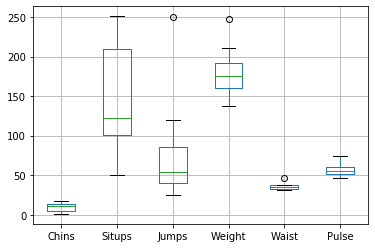

In [18]:
linnerud.boxplot()

### 다중공선성

In [39]:
# features : Chins, Situps, Jumps
# targets : Weight, Waist, Pulse
# features를 이용해서 targets를 한번에 예측할 수도 있지만, 
# targets를 한개씩 따로 예측하는 방법도 있다.(targets이 3개이므로 총 3번 예측) 
linnerud

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [40]:
# 다중공선성 : 종속변수를 설명하는 독립변수끼리 강한 선형 관계가 있을 경우, 모델에 부정적인 영향을 미친다.
#             종속변수는 target, 독립변수는 feature를 의미함(통계용어)
#             예를 들어, [chins, situps, jumps, weight, waist] 를 독립변수로 하고 pulse를 예측한다고 하자.
#             몸무게가 많이 나가는 사람은 허리 둘레도 클 가능성이 높을 것이다. weight와 waist는 다중공선성이 발생한다.
#             실제로 weight와 waist는 상관관계가 0.87로 매우 높은 편이다.
# data leakage : 훈련 데이터에 테스트 데이터가 일부 섞이면서 발생
# data shift : 학습 데이터 셋과 테스트 데이터셋의 특성이 다른 경우
linnerud.corr()

,Chins,Situps,Jumps,Weight,Waist,Pulse
Chins,1.000000,0.695727,0.495760,-0.389694,-0.552232,0.150648
Situps,0.695727,1.000000,0.669206,-0.493084,-0.645598,0.225038
Jumps,0.495760,0.669206,1.000000,-0.226296,-0.191499,0.034933
Weight,-0.389694,-0.493084,-0.226296,1.000000,0.870243,-0.365762
Waist,-0.552232,-0.645598,-0.191499,0.870243,1.000000,-0.352892
Pulse,0.150648,0.225038,0.034933,-0.365762,-0.352892,1.000000


In [41]:
import seaborn as sns

C:\Users\JINHYO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


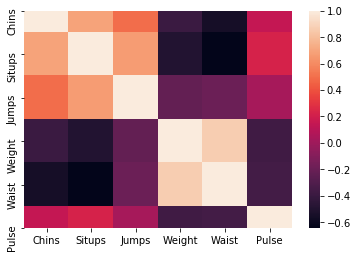

In [42]:
# 상관관계는 heatmap으로 시각화하면 더 눈에 잘 들어온다.
sns.heatmap(linnerud.corr())

### MultiOutputRegressor



In [76]:
# MultiLabel 알고리즘은 동시에 2개 이상을 예측하는 것이다. 
from sklearn.multioutput import MultiOutputRegressor

In [77]:
from sklearn.linear_model import LinearRegression

In [81]:
mor = MultiOutputRegressor(LinearRegression())

In [83]:
mor.fit(linnerud.iloc[:, :3], linnerud.iloc[:,3:])

MultiOutputRegressor(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                     n_jobs=None)

In [84]:
mor.predict([[3,3,3]])

array([[206.43455543,  40.15017565,  52.08453813]])

### MultiOutputClassifier

In [27]:
from sklearn.multioutput import MultiOutputClassifier

In [28]:
# 정형 데이터를 만들기 위한 전처리 (preprocessing)
from sklearn.preprocessing import MultiLabelBinarizer

In [30]:
# 임의로 만든 비정형 target 데이터가 있다.
# 기계학습을 하기 위해서는 정형 데이터로 만들어야 한다.
t = [[0,1], [2], [0,2], [0,1,2]]

In [29]:
# multi-hot encoding
mlb = MultiLabelBinarizer()

In [31]:
# one-hot encoding은 각 행마다 1이 한개,
# multi-hot encoding은 각 행마다 1이 여러개 가능
# 전처리할 때는 fit_transform
mlb.fit_transform(t)

array([[1, 1, 0],
       [0, 0, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [85]:
temp_X = np.random.rand(4,4)
temp_y = mlb.fit_transform(t)

In [86]:
temp_X

array([[0.8318349 , 0.43435266, 0.22784199, 0.42659522],
       [0.6012714 , 0.62802267, 0.30710365, 0.68873913],
       [0.41493544, 0.76774959, 0.27161929, 0.87082526],
       [0.97130143, 0.73786558, 0.4451455 , 0.02708181]])

In [87]:
moc = MultiOutputClassifier(LogisticRegression())

In [88]:
moc.fit(temp_X, temp_y)

MultiOutputClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_jobs=None)

In [89]:
moc.predict([[3,3,3,3]])

array([[1, 0, 1]])

## Multi-class

### One vs One

In [22]:
# Multiclass 알고리즘은 맞추고자하는 class가 2개 이상이다. 
# One vs One 방식은 multi-class를 1대1로 다 비교하는 방식이다.
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
# scikit-learn은 항상 인스턴스화
# TypeError: __init__() missing 1 required positional argument: 'estimator'
ovo = OneVsOneClassifier()

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# estimator는 모델의 인스턴스를 일컫는다.
ovo = OneVsOneClassifier(LogisticRegression())

In [26]:
ovo.fit(data2.data, data2.target)

OneVsOneClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   n_jobs=None)

In [62]:
ovo.predict([[3,3,3,3]])

array([1])

### One vs Rest

In [67]:
# One vs. All 또는 One vs. Rest (같은 말)
from sklearn.multiclass import OneVsRestClassifier

In [68]:
ovr = OneVsRestClassifier(LogisticRegression())

In [69]:
ovr.fit(data2.data, data2.target)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [70]:
# One vs One 방식과 예측 결과가 다르다. 
ovr.predict([[3,3,3,3]])

array([2])

scikit-learn의 알고리즘은 내부적으로 One vs Rest 방식으로 구현되어 있다.

In [71]:
lr = LogisticRegression()

In [72]:
lr.fit(data2.data, data2.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
lr.predict([[3,3,3,3]])

array([0])

In [74]:
# proba = probability(확률)
# proba는 확률을 예측
# scikit-learn은 내부적으로 One vs Rest 방식으로 구현되었다.
# One vs Rest 방식으로 각 클래스별 예측 확률을 구하고, 가장 확률이 높은 클래스를 최종 예측으로 제시한다.
lr.predict_proba([[3,3,3,3]])

array([[0.56963387, 0.16334678, 0.26701935]])

## pandas-profiling

In [ ]:
!pip install --user pandas-profiling

In [43]:
# 관례상 설치는 -, 사용은 _ 이다.
# user permission 에러가 발생하면 재부팅한다.
import pandas_profiling

In [44]:
dir(pandas_profiling) # 처음보면 dir

['Path',
 'ProfileReport',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__init__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_column_names',
 'config',
 'controller',
 'describe_df',
 'display_notebook_iframe',
 'get_config_default',
 'get_project_root',
 'model',
 'np',
 'pandas_decorator',
 'pd',
 'rename_index',
 'sys',
 'templates',
 'to_html',
 'utils',
 'version',
 'view',
 'warnings']

In [45]:
iris = sns.load_dataset('iris')

In [46]:
# 데이터셋을 분석해서 반응형 웹으로 분석 리포트를 만들어준다.
# 커스터마이징해서 나만의 분석도구로 만들 수 있다.
pandas_profiling.ProfileReport(iris)

In [47]:
mpg = sns.load_dataset('mpg')

In [49]:
# 분석 리포트를 할당한다. 
x = pandas_profiling.ProfileReport(mpg)

In [ ]:
# to_ 계열은 저장하는 기능이다.
# html 코드로 변환해준다.
x.to_html()

In [50]:
# 웹 파일로 저장한다.
x.to_file('mpg.html')

## Non Parametric Model

In [51]:
# Decision Tree(의사결정나무)는 데이터 기반으로 모델을 만든다.
from sklearn.tree import DecisionTreeClassifier

In [52]:
# criterion -> gini: 통계쪽 방식 / entropy: CS쪽 방식
dt = DecisionTreeClassifier()

In [53]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
dt.fit(iris.iloc[:, :-1], iris.species)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
# feature_importances_ <- 알고리즘에 처음 보는 attribute가 있다.
# 모델이 예측하는데 있어서 feature별로 중요도를 매긴다.
# petal_length, petal_width가 점수가 높다.
dt.feature_importances_

array([0.01333333, 0.        , 0.06405596, 0.92261071])

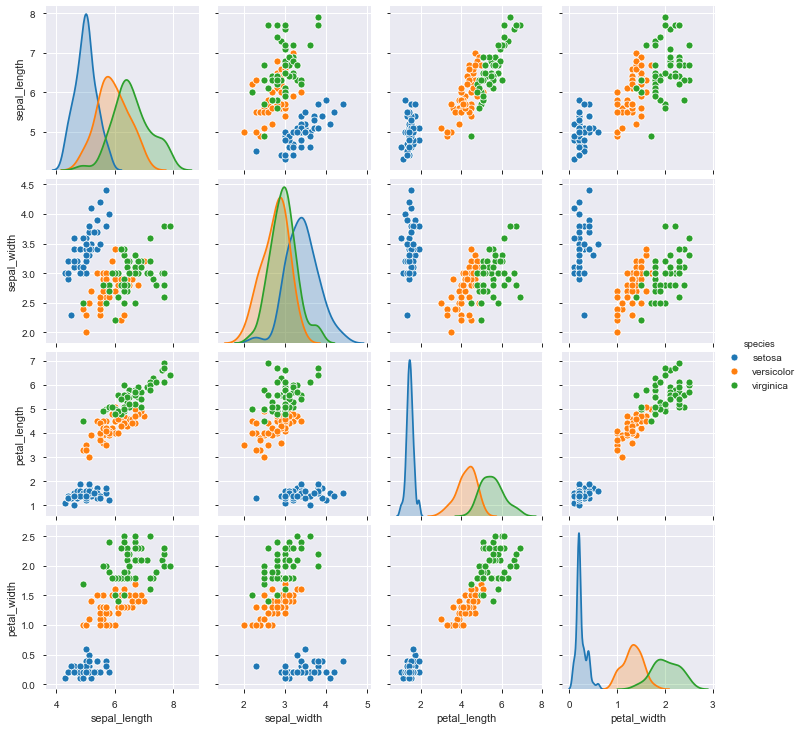

In [56]:
# petal_length, petal_width가 눈으로 보기에도 잘 분류한다.
sns.pairplot(iris, hue='species')

In [57]:
from sklearn.tree import plot_tree

[Text(223.2, 274.065, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(188.86153846153846, 224.235, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(257.53846153846155, 224.235, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(137.35384615384615, 174.405, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(68.67692307692307, 124.57499999999999, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(34.33846153846154, 74.745, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(103.01538461538462, 74.745, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 124.57499999999999, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(171.69230769230768, 74.745, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(240.36923076923077, 74.745, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(206.03076923076924, 24.914999999999964, 'gini = 0.0\nsamples 

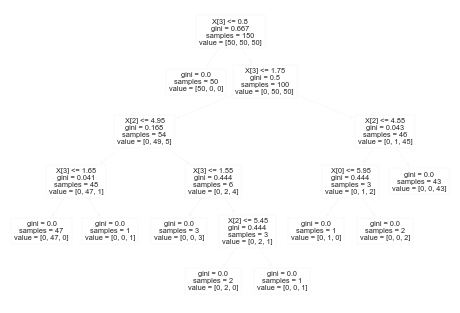

In [60]:
# Decision Tree 알고리즘이 어떻게 분류했는지 시각화해준다.
# graphviz 설치가 안되어있으면 Error
plot_tree(dt)